In [1]:
from array import array
import math
import random

In [2]:
ichoice = 2

random.seed(1)

n = 16000
nwaves = 1000
pi = math.pi
lmbda = 1.0
xlow = -24.0*lmbda
dx = 48.0*lmbda/n
k=2.0*pi/lmbda
delta_k = 0.05*k

x = array('d')
y = array('d')
yf = array('d')

sim_integral = 0.0
theory_integral = 0.0
ytemp = 0.0
for i in range(0,n):
    x.append(xlow+i*dx+.0000001)
    for j in range(0,nwaves):
        ytemp = ytemp + math.sin((k-delta_k+2.0*delta_k*random.random())*x[i])
    ytemp = 1.0/(nwaves)*ytemp*math.sqrt(delta_k/math.sqrt(2))
    #if (i == 4000):
    #    ytemp = 1.0
    y.append(ytemp*ytemp)
    yf.append(math.sqrt(2.0/(pi*delta_k))*math.sin(k*x[i])*math.sin(delta_k*x[i])/x[i])
    yf[i]=yf[i]*yf[i]
    sim_integral += y[i]*dx
    theory_integral += yf[i]*dx
    
ymax = max(y)
ycrit = ymax/2.0

delta_x_theory = 2.0/(delta_k)

for i in range(n):
    if (y[i] > ycrit):
        xstart = x[i]
        break
for i in range(n-1,0,-1):
    if (y[i] > ycrit):
        xend = x[i]
        break

print(delta_x_theory,xend-xstart)
    
    
print ("Sim integral = %f" % sim_integral)
print ("Theory integral = %f" % theory_integral)


6.366197723675814 8.561999999999998
Sim integral = 1.067340
Theory integral = 0.955889


Welcome to JupyROOT 6.18/02


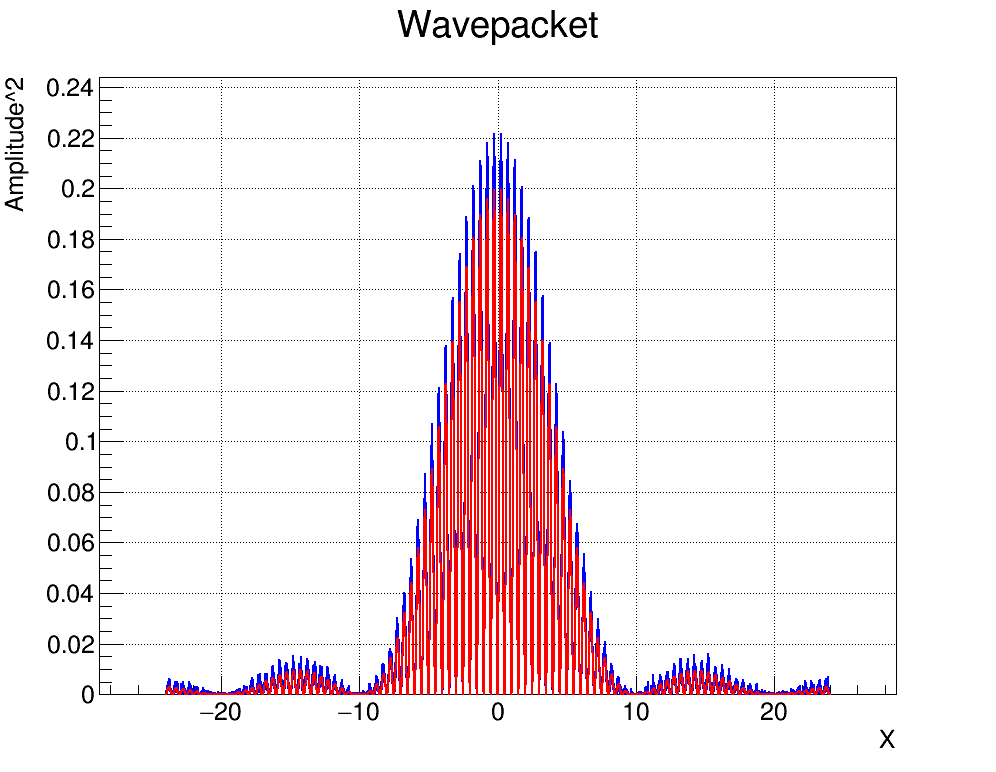

In [3]:
from ROOT import TCanvas
from ROOT import TGraph
from ROOT import gStyle
c1 = TCanvas( 'c1', 'The Main Canvas', 200, 10, 1000, 800 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(3,1)

gStyle.SetOptFit(1)
c1.cd()

gr = TGraph(n,x,y)
grf = TGraph(n,x,yf)

gr.SetLineColor(4)
gr.SetLineWidth(2)
grf.SetLineColor(2)
grf.SetLineWidth(2)

gr.SetTitle("Wavepacket")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Amplitude^2")

gr.Draw("AL")
if (ichoice>1):
    grf.Draw("L")
    
c1.Draw()